In [82]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, num_obs_linkage
import numpy as np
import matplotlib.pyplot as plt


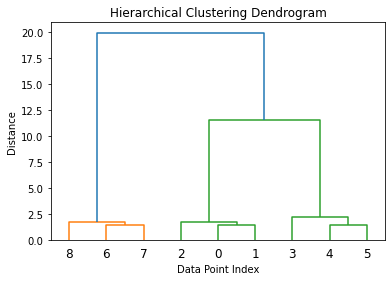

Cluster labels: [2 2 2 3 3 3 1 1 1]


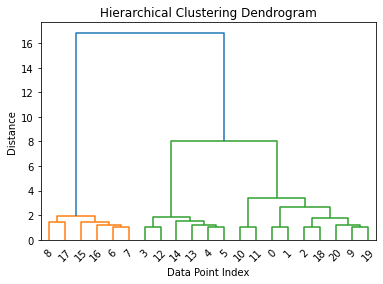

Cluster labels: [3 3 3 2 2 2 1 1 1 3 3 3 2 2 2 1 1 1 3 3 3]


In [86]:
def plot_dendrogram(data):
    """
    Plot a dendrogram for hierarchical clustering.
    
    Parameters:
        data (numpy.ndarray): The data for clustering.
    
    Returns:
        None
    """
    # Perform hierarchical clustering
    linkage_matrix = linkage(data, method='average')
    
    # Create the dendrogram
    dendrogram(linkage_matrix, orientation='top')
    
    # Display the plot
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Data Point Index')
    plt.ylabel('Distance')
    plt.show()

def choose_clusters(data):
    """
    Choose the number of clusters interactively from a dendrogram.
    
    Parameters:
        data (numpy.ndarray): The data for clustering.
    
    Returns:
        labels (numpy.ndarray): The cluster labels.
    """
    # Plot the dendrogram
    plot_dendrogram(data)
    
    # Prompt user for the number of clusters
    num_clusters = int(input("Enter the number of clusters: "))
    
    # Perform hierarchical clustering with the chosen number of clusters
    linkage_matrix = linkage(data, method='average')
    labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
    return labels

# Example usage:
data1 = np.array([
    [1, 2, 3, 4],
    [2, 2, 3, 3],
    [2, 3, 4, 4],
    [8, 8, 7, 8],
    [9, 8, 8, 9],
    [9, 9, 8, 10],
    [15, 15, 14, 16],
    [16, 15, 14, 17],
    [16, 16, 15, 17]
])

data2 = np.array([
    [1, 2, 3],
    [2, 2, 3],
    [2, 3, 4],
    [8, 8, 7],
    [9, 8, 8],
    [9, 9, 8],
    [15, 15, 14],
    [16, 15, 14],
    [16, 16, 15],
    [4, 4, 4],
    [5, 5, 4],
    [6, 5, 4],
    [7, 8, 7],
    [8, 8, 8],
    [8, 9, 9],
    [14, 15, 14],
    [15, 15, 15],
    [15, 16, 16],
    [3, 3, 4],
    [4, 3, 4],
    [4, 4, 3],
])

# The data now contains 21 data points with 3 features each.

cluster_labels = choose_clusters(data1)
print("Cluster labels:", cluster_labels)

cluster_labels = choose_clusters(data2)
print("Cluster labels:", cluster_labels)
